### traj_6210-6240_0002431541-318M20100105

** packages **

In [1]:
from ctd2xray import cchdo
from mpl_toolkits.basemap import Basemap
from pymongo import MongoClient
import gsw
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xarray as xr
from Circles.circles import circle

In [2]:
%matplotlib inline

** traj_6210-6240_0002431541 **

Jan. 2, 2010 - Feb. 1, 2010

In [12]:
rcs_eddies = MongoClient().eddies.rcs_eddies

In [13]:
eddy_code = 'traj_6210-6240_0002431541'

In [14]:
eddy_rclv = rcs_eddies.find_one({'_id': eddy_code})

In [15]:
eddy_traj = eddy_rclv['features'][2]['geometry']['coordinates']

In [16]:
obs_num = len(eddy_traj)

In [17]:
lon_eddy = np.zeros(obs_num)
lat_eddy = np.zeros(obs_num)

In [18]:
for i in range(obs_num):
    lon_eddy[i] = eddy_traj[i][0]
    lat_eddy[i] = eddy_traj[i][1]

** 318M20100105 **

Jan. 5, 2010 - Feb. 10, 2010

In [28]:
cchdo_ctd = MongoClient().eddies.cchdo_ctd

In [29]:
expo_code = '318M20100105'

In [30]:
cas_num = cchdo_ctd.find({'expocode': expo_code}).count()

In [31]:
lon_expo = np.zeros(cas_num)
lat_expo = np.zeros(cas_num)

In [32]:
# longitude range setting
# from 0 to 360
def format(longitude):
    if longitude > 0:
        longitude = longitude
    else:
        longitude = longitude + 360
    return longitude

In [33]:
i = 0
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    lon_expo[i] = format(expo['location']['coordinates'][0])
    lat_expo[i] = expo['location']['coordinates'][1]
    i = i+1

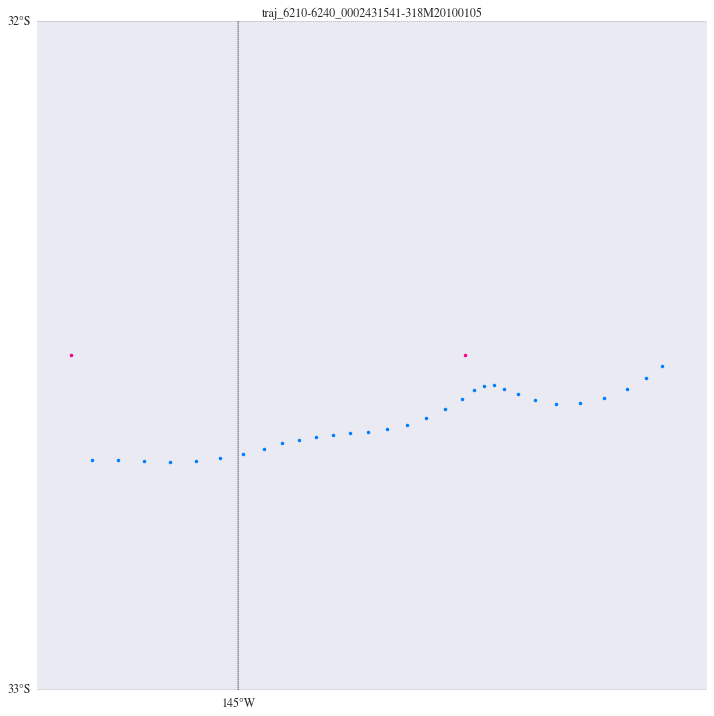

In [41]:
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
my_map = Basemap(projection='cyl', llcrnrlat=-33, urcrnrlat=-32,\
                 llcrnrlon=214.7, urcrnrlon=215.7, resolution='c')
my_map.fillcontinents()
parallels = np.arange(-90, 90, 1)
my_map.drawparallels(parallels, labels=[True,False,False,True])
meridians = np.arange(0, 360, 1)
my_map.drawmeridians(meridians, labels=[True,False,False,True])
x_eddy, y_eddy = my_map(lon_eddy, lat_eddy)
x_expo, y_expo = my_map(lon_expo, lat_expo)
my_map.plot(x_eddy, y_eddy, '.', color='#0080ff')
my_map.plot(x_expo, y_expo, '.', color='#ff0080')
plt.title(eddy_code + '-' + expo_code)
#plt.savefig('figures/figure-1/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** temperature-salinity **

In [42]:
STA = 131
CAS = 1

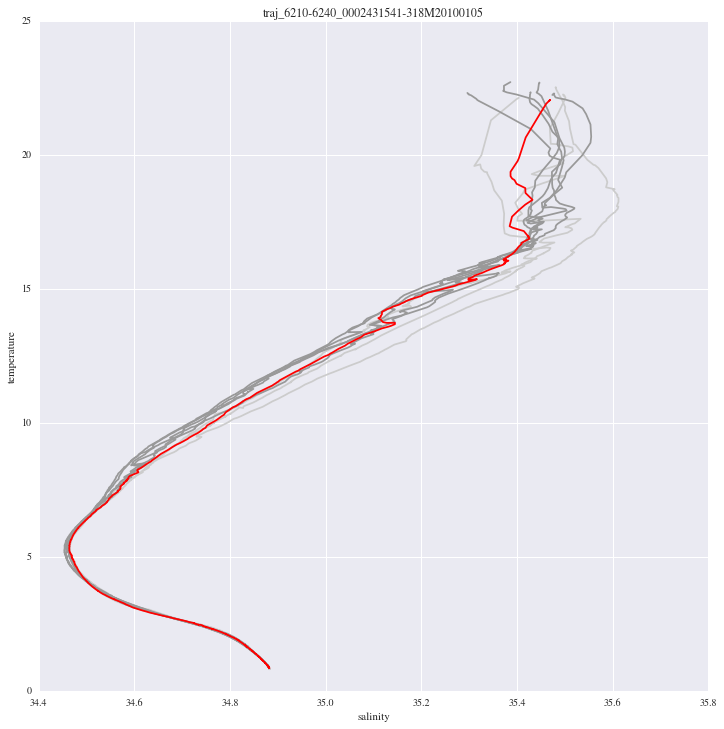

In [43]:
sns.set(color_codes=True)
mpl.rcParams['font.family'] = "STIX"
mpl.rcParams['figure.figsize'] = (12, 12)
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    woce = str(ds.WOCE_ID)
    time = ds.time.values[0]
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        DAT = time
        LAT = lat
        LON = lon
        plt.plot(sa, ct, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(sa, ct, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(sa, ct, color='#999999', zorder=1)
#plt.xlim([32.5, 35])
#plt.ylim([0, 10])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('salinity')
plt.ylabel('temperature')
plt.savefig('figures/figure-2/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-temperature **

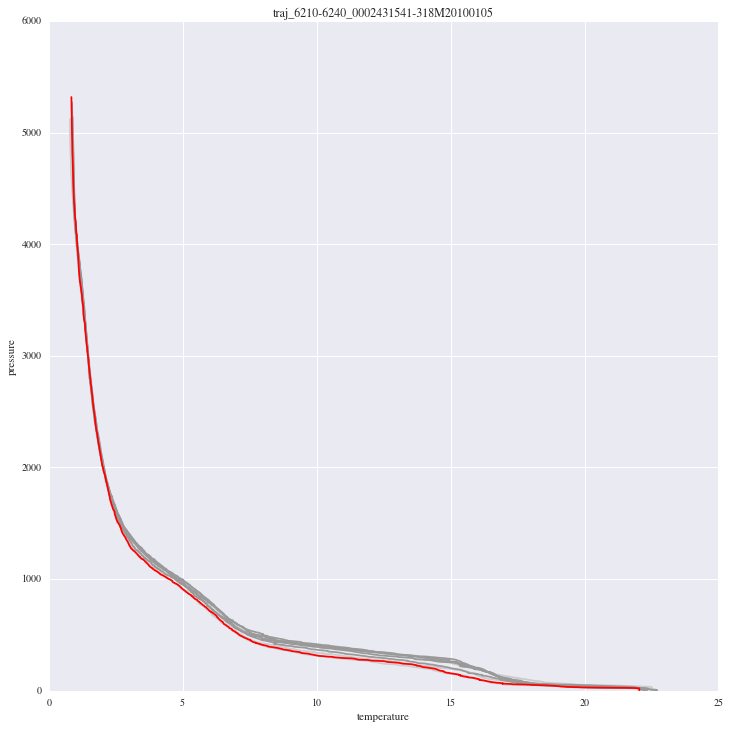

In [44]:
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    woce = str(ds.WOCE_ID)
    time = ds.time.values[0]
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        LAT = lat
        plt.plot(ct, p, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(ct, p, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(ct, p, color='#999999', zorder=1)
#plt.xlim([0, 20])
#plt.ylim([1000, 0])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('temperature')
plt.ylabel('pressure')
plt.savefig('figures/figure-3/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-salinity **

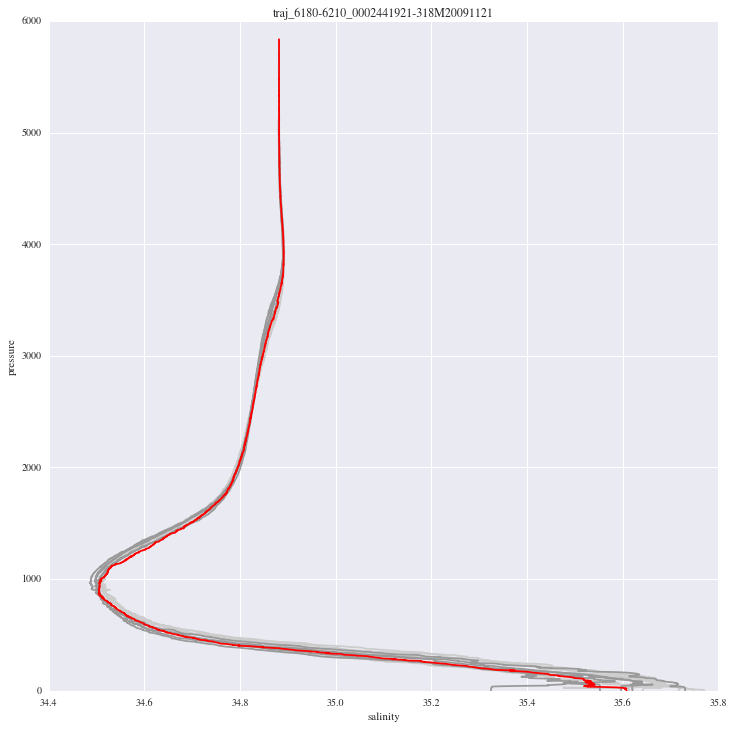

In [34]:
sns.set(color_codes=True)
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    time = ds.time.values[0]
    woce = str(ds.WOCE_ID)
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        DAT = time
        LAT = lat
        plt.plot(sa, p, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(sa, p, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(sa, p, color='#999999', zorder=1)
#plt.xlim([32.5, 36])
#plt.ylim([1000, 0])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('salinity')
plt.ylabel('pressure')
plt.savefig('figures/figure-4/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

** pressure-oxygen **

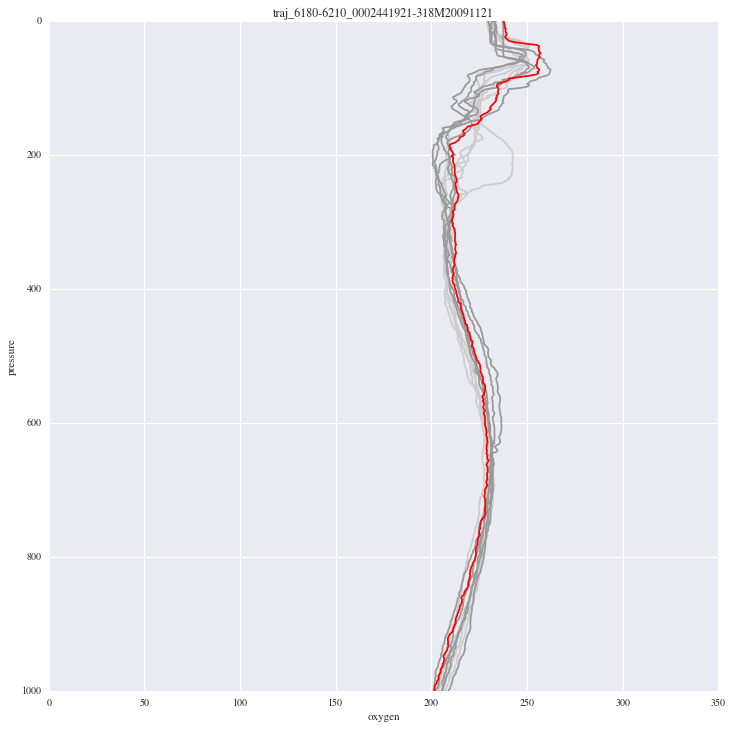

In [35]:
sns.set(color_codes=True)
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['font.family'] = "STIX"
for expo in cchdo_ctd.find({'expocode': expo_code}).sort('time', 1):
    ds = xr.open_dataset(expo['path'])
    woce = str(ds.WOCE_ID)
    time = ds.time.values[0]
    lon = ds.longitude.values[0]
    lat = ds.latitude.values[0]
    p = ds.pressure.values
    t = ds.temperature.values
    s = ds.salinity.values
    o = ds.oxygen.values
    sa = gsw.SA_from_SP(s, p, lon, lat)
    ct = gsw.CT_from_t(sa, t, p)
    station = int(filter(str.isdigit, str(ds.STATION_NUMBER)))
    cast = int(filter(str.isdigit, str(ds.CAST_NUMBER)))
    if (station == STA and cast == CAS):
        LAT = lat
        plt.plot(o, p, color='#ff0000', zorder=2)
    elif (STA-6) < station < STA:
        plt.plot(o, p, color='#cccccc', zorder=1)
    elif STA < station < (STA+6):
        plt.plot(o, p, color='#999999', zorder=1)
plt.xlim([0, 350])
plt.ylim([1000, 0])
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('oxygen')
plt.ylabel('pressure')
plt.savefig('figures/figure-5/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

In [45]:
expo

{u'_id': ObjectId('583c77e22895ee70a2e31cd4'),
 u'cast': u'1',
 u'category': u'CTD',
 u'expocode': u'318M20100105',
 u'location': {u'coordinates': [-71.7045, -32.5009], u'type': u'Point'},
 u'path': u'/home/cz2397/data/cchdo-ctd/579_p06_318M20100105_nc_ctd/25001_ctd.nc',
 u'station': u'250',
 u'time': datetime.datetime(2010, 2, 9, 17, 13)}

** contours **

In [46]:
path_list = '/home/cz2397/data/cchdo-ctd/579_p06_318M20100105_nc_ctd/*_ctd.nc'

In [47]:
pressure = np.linspace(0, 6000, num=6001, endpoint=True)

In [48]:
ds_tim = cchdo.open_cchdo_as_mfdataset(path_list, pressure)

In [49]:
ds_lon = ds_tim.swap_dims({'time': 'longitude'})

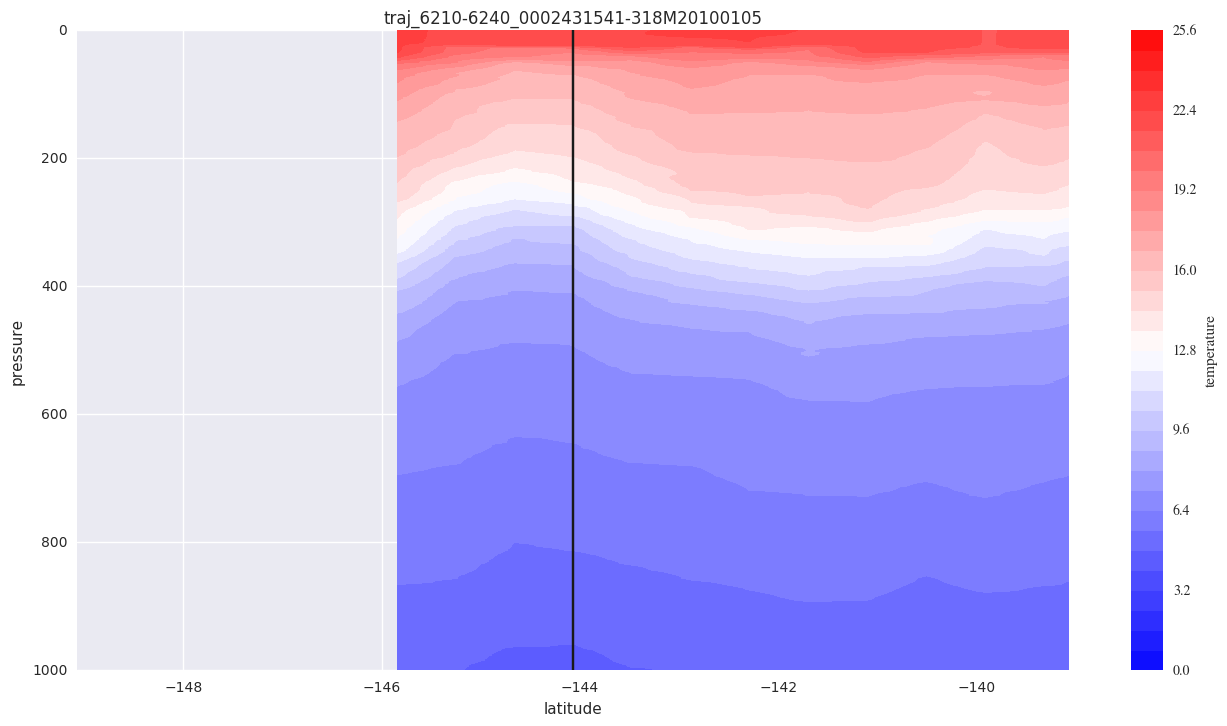

In [55]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(16, 8))
mpl.rcParams['font.family'] = "STIX"
image = ds_lon.temperature_i.T.plot.contourf(yincrease=False, ax=ax, cmap='bwr',\
                                             vmin=0, vmax=25, levels=40)
image.colorbar.set_label('temperature')
plt.xlim([LON-5, LON+5])
plt.ylim([1000, 0])
plt.axvline(LON, color='k')
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('latitude')
plt.ylabel('pressure')
plt.savefig('figures/figure-6/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

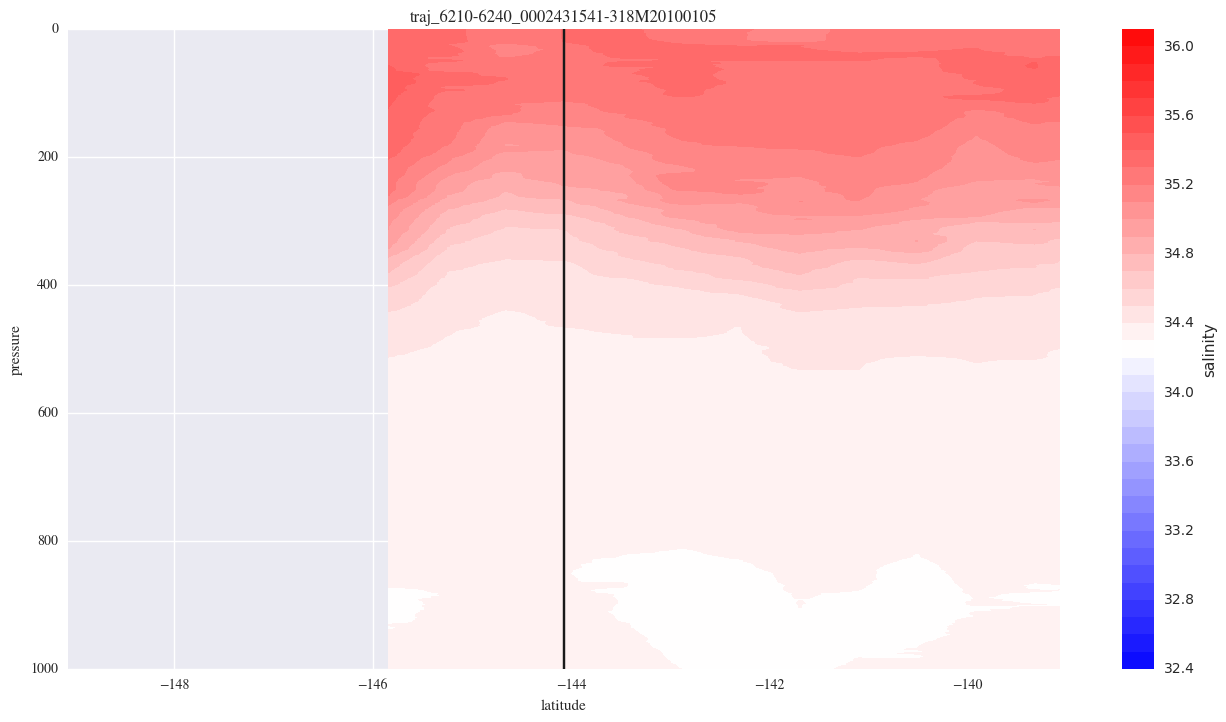

In [56]:
mpl.rcParams['font.family'] = 'STIX'
fig, ax = plt.subplots(figsize=(16, 8))
sns.set(color_codes=True)
image = ds_lon.salinity_i.T.plot.contourf(yincrease=False, ax=ax, cmap='bwr',\
                                          vmin=32.5, vmax=36, levels=40)
image.colorbar.set_label('salinity')
plt.xlim([LON-5, LON+5])
plt.ylim([1000, 0])
plt.axvline(LON, color='k')
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('latitude')
plt.ylabel('pressure')
plt.savefig('figures/figure-7/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()

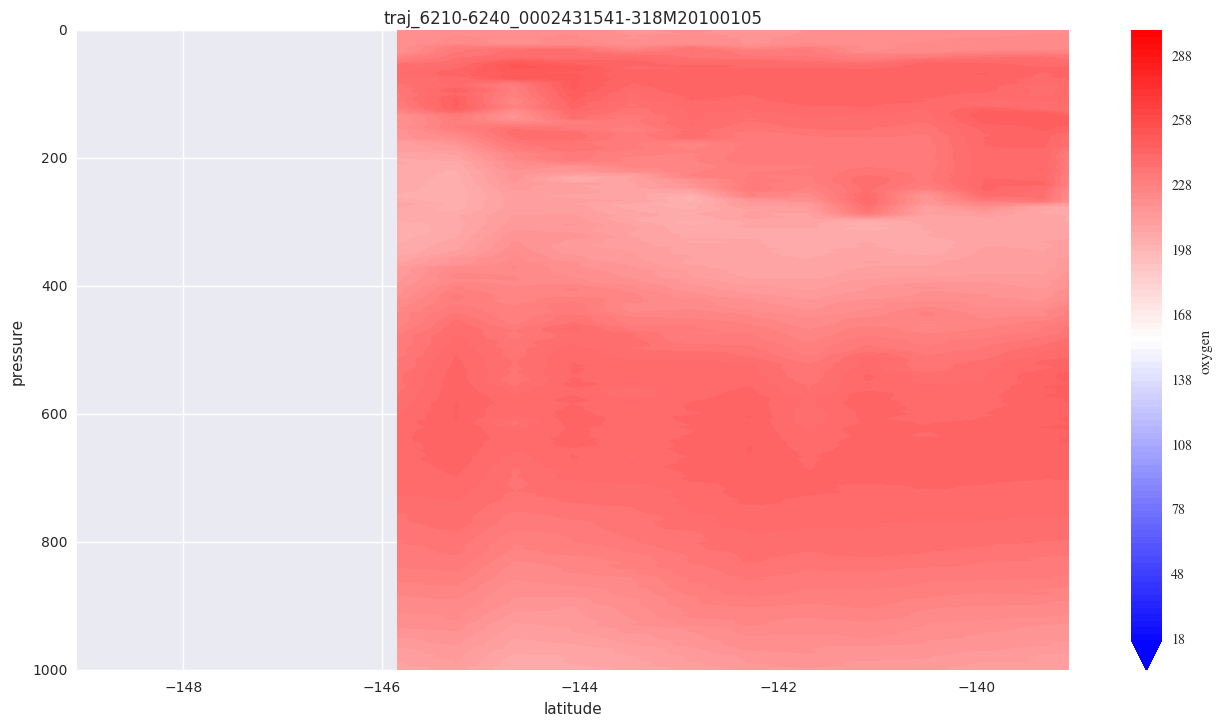

In [59]:
sns.set(color_codes=True)
fig, ax = plt.subplots(figsize=(16, 8))
mpl.rcParams['font.family'] = "STIX"
image = ds_lon.oxygen_i.T.plot.contourf(yincrease=False, ax=ax, cmap='bwr',\
                                        vmin=20, vmax=300, levels=100)
image.colorbar.set_label('oxygen')
plt.xlim([LON-5, LON+5])
plt.ylim([1000, 0])
plt.axvline(LAT, color='k')
plt.title(eddy_code + '-' + expo_code)
plt.xlabel('latitude')
plt.ylabel('pressure')
plt.savefig('figures/figure-8/' + eddy_code + '-' + expo_code + '.jpeg')
plt.show()